In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import tensorflow as tf, matplotlib.pyplot as plt
import os

from tensorflow.keras import layers

## Data load

In [3]:
os.chdir('/content/drive/MyDrive/Cephalogram')
# our modules
import ceph_config as cf

cf.RESOLUTION_CONFIG

32

In [4]:
image_feature = np.load(os.path.join(os.getcwd(), 'output', f'{cf.RESOLUTION_CONFIG}', 'image', 'image.npy'))

image_feature_2 = image_feature.astype('float32')

In [5]:
image_feature_2.shape

(6928, 32, 32)

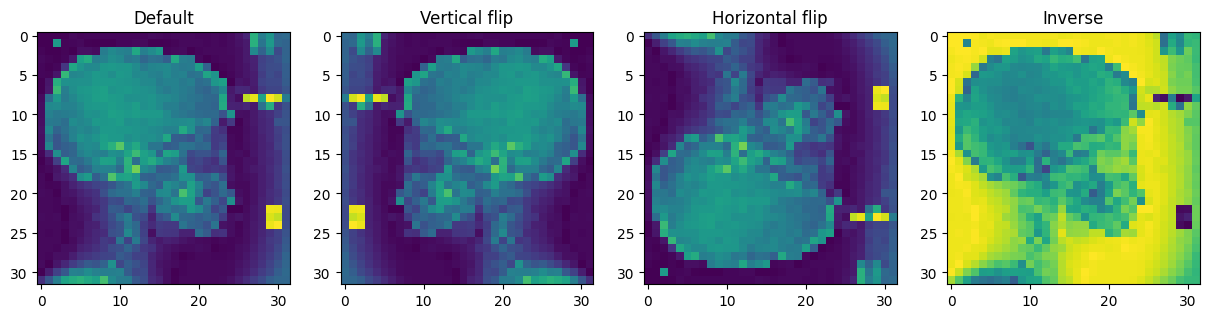

In [16]:
plt.figure(figsize = (15, 15))

# plt.xticks('')
# plt.yticks('')

plt.subplot(241)
plt.title('Default')
plt.imshow(image_feature_2[0])

plt.subplot(242)
plt.title('Vertical flip')
plt.imshow(image_feature_2[1])

plt.subplot(243)
plt.title('Horizontal flip')
plt.imshow(image_feature_2[2])

plt.subplot(244)
plt.title('Inverse')
plt.imshow(image_feature_2[4])

In [44]:
# from utils_img import calculate_features
import cv2
bins=cf.RESOLUTION_CONFIG

histogram_1 = cv2.calcHist([image_feature_2[0]], [0], None, [bins], [0, 1])
histogram_2 = cv2.calcHist([image_feature_2[1]], [0], None, [bins], [0, 1])
histogram_3 = cv2.calcHist([image_feature_2[2]], [0], None, [bins], [0, 1])
histogram_4 = cv2.calcHist([image_feature_2[4]], [0], None, [bins], [0, 1])

histogram_1 = cv2.normalize(histogram_1, histogram_1).flatten()
histogram_2 = cv2.normalize(histogram_2, histogram_2).flatten()
histogram_3 = cv2.normalize(histogram_3, histogram_3).flatten()
histogram_4 = cv2.normalize(histogram_4, histogram_4).flatten()

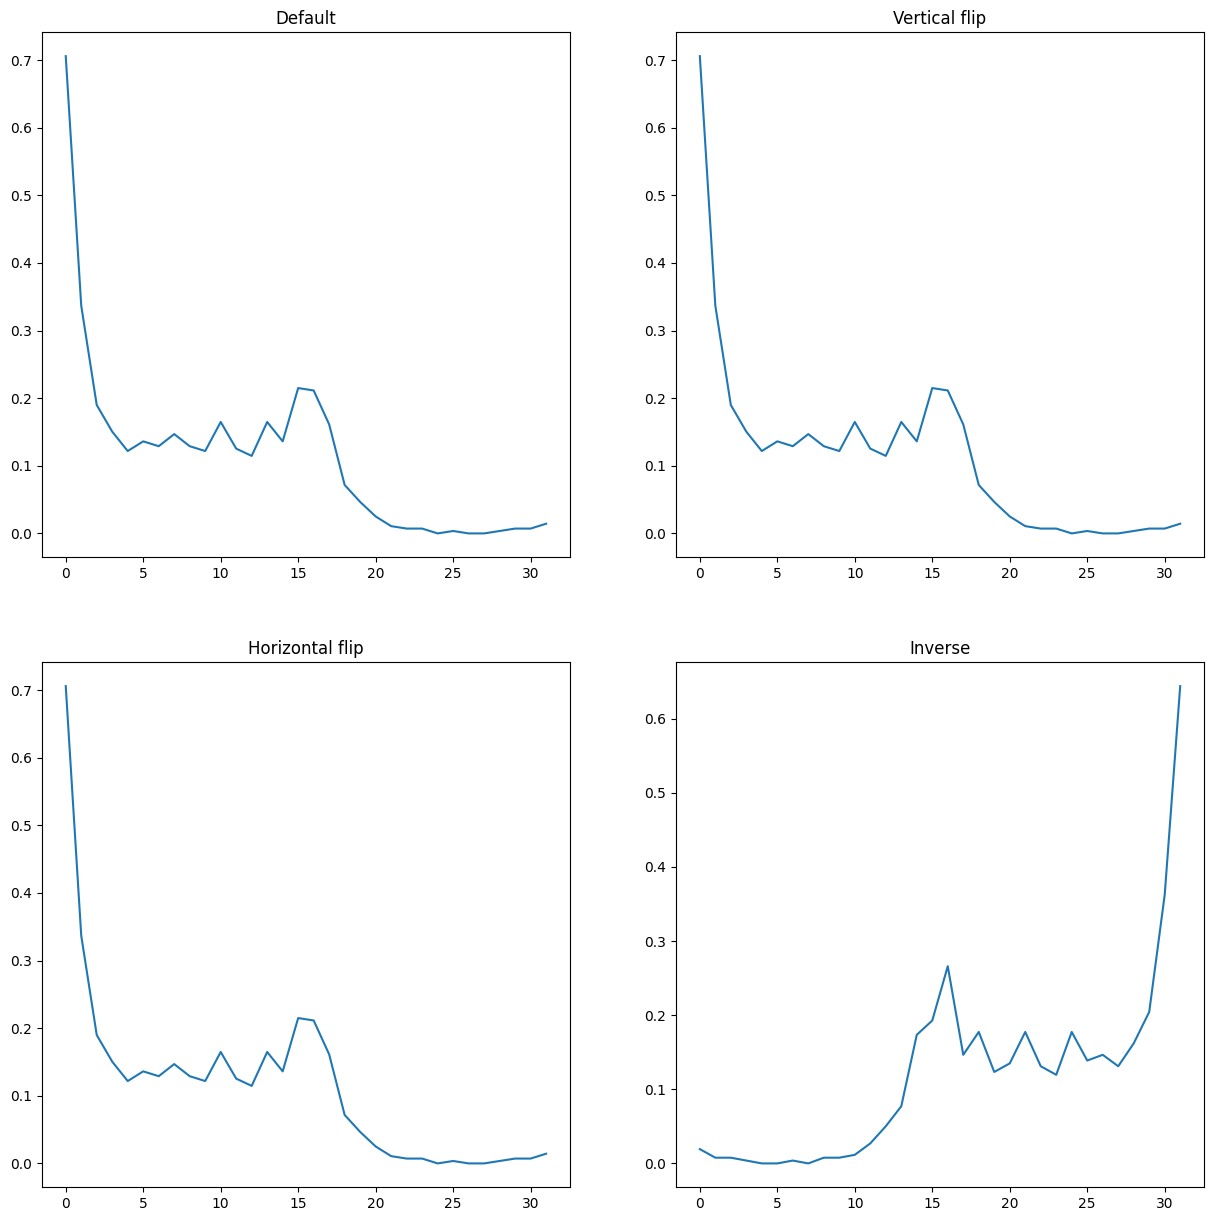

In [45]:
plt.figure(figsize = (15, 15))

plt.subplot(221)
plt.title('Default')
plt.plot(histogram_1)

plt.subplot(222)
plt.title('Vertical flip')
plt.plot(histogram_2)

plt.subplot(223)
plt.title('Horizontal flip')
plt.plot(histogram_3)

plt.subplot(224)
plt.title('Inverse')
plt.plot(histogram_4)